<a href="https://colab.research.google.com/github/Username0515/jetbot_autopilot/blob/2021-07-21-1/mobilenetTF_2021_07_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전이학습 준비


In [ ]:
import numpy as np
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
 
model = MobileNet(input_shape=(128, 128, 3),include_top=False,weights='imagenet')

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
from tensorflow import keras

# model.summary()

In [ ]:
for layer in model.layers:
  layer.trainable = False

In [ ]:
last_layer = model.get_layer("conv_pw_13_relu")
last_output = last_layer.output

# 추가 레이어

In [ ]:
x = keras.layers.MaxPool2D()(last_output)
x= keras.layers.Flatten()(x)
x = keras.layers.Dense(1000, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(4, activation='softmax')(x)



In [ ]:
from tensorflow.keras import Model
making_model = Model(model.input,x)

In [ ]:
making_model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 64, 64, 32)        0     

# 예제 데이터 준비

In [ ]:
import pathlib
import tensorflow as tf
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 2s 0us/step


In [ ]:
roses = list(data_dir.glob('roses/*'))

In [ ]:
 import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
 aa =PIL.Image.open(str(roses[0]))
 
 batch_size = 32
img_height = 128
img_width = 128

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
# from tensorflow import keras
# from sklearn.model_selection import train_test_split



# (train_input, train_target), (test_input, test_target) = \
#     keras.datasets.cifar10.load_data()

# train_scaled = train_input.reshape(-1, 32, 32, 3) / 255.0

# train_scaled, val_scaled, train_target, val_target = train_test_split(
#     train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
# train_target = keras.utils.to_categorical(train_target)
# val_target = keras.utils.to_categorical(val_target)

NameError: ignored

# 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


# 도로 데이터 준비


In [ ]:
import glob
import cv2


data_file_path="/content/gdrive/MyDrive/photo/photo_slice/*.png"
data_file_path_middle="/content/gdrive/MyDrive/photo/class/middle/*.png"
data_file_path_right="/content/gdrive/MyDrive/photo/class/right/*.png"
data_file_path_left="/content/gdrive/MyDrive/photo/class/left/*.png"
data_file_path_none="/content/gdrive/MyDrive/photo/class/none/*.png"
size_pixel=128


middle_img = []
none_img = []
right_img=[]
left_img=[]
middle_num=0
none_num=0
left_num=0
right_num=0 

i=0
for file in glob.glob(data_file_path_middle):
     mid_img=cv2.imread(str(file))
     i+=1
     middle_img.append(mid_img)
     print("현재 중앙선 진행중:::  {} %".format( 100* round(i/len(lob.glob(data_file_path_middle)),4)  ))
     
print("현재 중앙선 파일 개수 :::  {} 개".format(i))

middle_num =i


i=0
for file in glob.glob(data_file_path_none):
     n_img=cv2.imread(str(file))
     i+=1
     none_img.append(n_img)
     print("현재 none 진행중:::  {} %".format(  100*round(i/len(lob.glob(data_file_path_middle)),4)  ))
print("현재 none 파일 개수 :::  {} 개".format(i))
none_num = i


i=0
for file in glob.glob(data_file_path_right):
     n_img=cv2.imread(str(file))
     i+=1
     right_img.append(n_img)
     print("현재 right 진행중:::  {} %".format(  100*round(i/len(lob.glob(data_file_path_middle)),4)  ))
print("현재 right 파일 개수 :::  {} 개".format(i))
right_num = i


i=0
for file in glob.glob(data_file_path_left):
     n_img=cv2.imread(str(file))
     i+=1
     left_img.append(n_img)
     print("현재 left 진행중:::  {} %".format( 100* round(i/len(lob.glob(data_file_path_middle)),4)  ))
print("현재 left 파일 개수 :::  {} 개".format(i))
left_num = i



import numpy as np
target = np.concatenate( ( np.ones(middle_num) ,np.zeros(none_num) ,(np.zeros(right_num)+2), (np.zeros(left_num)+3)) )


#원 핫코딩

from tensorflow.keras.utils import to_categorical

target  = to_categorical(target)


# input data 합치기

train_input = middle_img + none_img  + right_img + left_img

train_input= np.array(train_input)



from sklearn.model_selection import train_test_split

train_scaled = train_input.reshape(-1,128,128,3)/255.0
target = target.reshape(-1,4)
train_input,val_input ,train_target,val_target = train_test_split(train_scaled,target,stratify=target,test_size =0.2,random_state=42)


현재 중앙선 진행중:::  0.0208 %
현재 중앙선 진행중:::  0.0417 %
현재 중앙선 진행중:::  0.0625 %
현재 중앙선 진행중:::  0.0833 %
현재 중앙선 진행중:::  0.1042 %
현재 중앙선 진행중:::  0.1224 %
현재 중앙선 진행중:::  0.1429 %
현재 중앙선 진행중:::  0.1633 %
현재 중앙선 진행중:::  0.1837 %
현재 중앙선 진행중:::  0.2041 %
현재 중앙선 진행중:::  0.2245 %
현재 중앙선 진행중:::  0.2449 %
현재 중앙선 진행중:::  0.2653 %
현재 중앙선 진행중:::  0.2857 %
현재 중앙선 진행중:::  0.3061 %
현재 중앙선 진행중:::  0.3265 %
현재 중앙선 진행중:::  0.3469 %
현재 중앙선 진행중:::  0.3673 %
현재 중앙선 진행중:::  0.3878 %
현재 중앙선 진행중:::  0.4082 %
현재 중앙선 진행중:::  0.4286 %
현재 중앙선 진행중:::  0.449 %
현재 중앙선 진행중:::  0.4694 %
현재 중앙선 진행중:::  0.4898 %
현재 중앙선 진행중:::  0.5102 %
현재 중앙선 진행중:::  0.5306 %
현재 중앙선 진행중:::  0.551 %
현재 중앙선 진행중:::  0.5714 %
현재 중앙선 진행중:::  0.5918 %
현재 중앙선 진행중:::  0.6122 %
현재 중앙선 진행중:::  0.6327 %
현재 중앙선 진행중:::  0.6531 %
현재 중앙선 진행중:::  0.6735 %
현재 중앙선 진행중:::  0.6939 %
현재 중앙선 진행중:::  0.7143 %
현재 중앙선 진행중:::  0.7347 %
현재 중앙선 진행중:::  0.7551 %
현재 중앙선 진행중:::  0.7755 %
현재 중앙선 진행중:::  0.7959 %
현재 중앙선 진행중:::  0.8163 %
현재 중앙선 진행중:::  0.8367 %
현재 중앙선 진행중:::  0.8

# 컴파일 및 훈련

In [ ]:
making_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
print(train_input.shape)
history = making_model.fit(train_input ,train_target, validation_data=(val_input,val_target),epochs=20,callbacks=[keras.callbacks.EarlyStopping(patience=2,restore_best_weights=False)])

(241, 128, 128, 3)
Epoch 1/20
8/8 [==============================] - 6s 525ms/step - loss: 4.0542 - accuracy: 0.6390 - val_loss: 0.9349 - val_accuracy: 0.8852
Epoch 2/20
8/8 [==============================] - 3s 444ms/step - loss: 1.2429 - accuracy: 0.8506 - val_loss: 0.9164 - val_accuracy: 0.9180
Epoch 3/20
8/8 [==============================] - 3s 447ms/step - loss: 0.7401 - accuracy: 0.9212 - val_loss: 0.7587 - val_accuracy: 0.9344
Epoch 4/20
8/8 [==============================] - 4s 454ms/step - loss: 0.2695 - accuracy: 0.9627 - val_loss: 0.8189 - val_accuracy: 0.9344
Epoch 5/20
8/8 [==============================] - 3s 446ms/step - loss: 0.1143 - accuracy: 0.9793 - val_loss: 0.8172 - val_accuracy: 0.9344


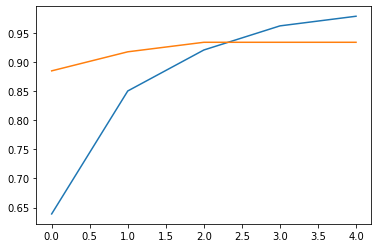

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

# 단일 분류

In [ ]:
import sys
import cv2
from matplotlib import pyplot as plt
import glob
import time

data_file_path = "/content/gdrive/MyDrive/photo/photo_slice/*.png"  #데이터 이미지 들어있는곳
black_background_path ="/content/gdrive/MyDrive/photo/black_background/black_background.png" #검정색 사진 들어있는곳
# roi_data_path ='/content/gdrive/MyDrive/photo/photo_slice/road_partical_data_{}.png'.format(numoftime)



size_pixel=128



i=0
for _ in glob.glob(data_file_path):
     i+=1
print("현재 파일 개수 :::  {} 개".format(i))

numoffile=i

src=[]
src_color=[]
i=0
for file in glob.glob(data_file_path):
     img=cv2.imread(str(file))
     img_color = img
     img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)                         
     img_color =cv2.resize(img_color,(size_pixel,size_pixel))
     img=cv2.resize(img,(size_pixel,size_pixel))
    #  src.append(img)
     src_color.append(img_color)
     predict_image = np.array(img_color)
     pre_scaled = predict_image.reshape(-1,128,128,3)/255.0
     max_pro= max(making_model.predict(pre_scaled[i]))
     max_listnum = making_model.predict(pre_scaled[i]).index(max_pro)


     if making_model.predict(pre_scaled)[0,0]>=0.5:
       pro = round(making_model.predict(pre_scaled)[0,0],4)
       print("확률 ::: {} ".format(pro))
       cv2.imwrite("/content/gdrive/MyDrive/photo/maybe/{}.png".format(i), img_color)
     elif making_model.predict(pre_scaled)[0,1]>=0.5:
       pro = round(making_model.predict(pre_scaled)[0,0],4)
       print("확률 ::: {} ".format(pro))
       cv2.imwrite("/content/gdrive/MyDrive/photo/maybe/{}.png".format(i), img_color)
     elif making_model.predict(pre_scaled)[0,2]>=0.5:
       pro = round(making_model.predict(pre_scaled)[0,0],4)
       print("확률 ::: {} ".format(pro))
       cv2.imwrite("/content/gdrive/MyDrive/photo/maybe/{}.png".format(i), img_color)
     elif making_model.predict(pre_scaled)[0,0]>=0.5:
       pro = round(making_model.predict(pre_scaled)[0,0],4)
       print("확률 ::: {} ".format(pro))
       cv2.imwrite("/content/gdrive/MyDrive/photo/maybe/{}.png".format(i), img_color)
     else:
       pro = round( making_model.predict(pre_scaled)[0,0],4)
       print("확률 ::: {} ".format(pro))
       cv2.imwrite("/content/gdrive/MyDrive/photo/maybenot/{}.png".format(i), img_color)
     i+=1
     print(" 파일 읽어오는중 :::  {} %".format(   round(100 * (i/numoffile)))    )
     print(" 현재 {} 중 {}번 진행중".format(numoffile , i))


# predict_image = np.array(predict_image)

# pre_scaled = predict_image.reshape(-1,128,128,3)/255.0
# print(predict_image.shape)
# making_model.predict(pre_scaled)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
확률 ::: 0.9997000098228455 
 파일 읽어오는중 :::  56 %
확률 ::: 0.006599999964237213 
 파일 읽어오는중 :::  56 %
확률 ::: 1.0 
 파일 읽어오는중 :::  56 %
확률 ::: 1.0 
 파일 읽어오는중 :::  56 %
확률 ::: 0.0 
 파일 읽어오는중 :::  56 %
확률 ::: 0.0 
 파일 읽어오는중 :::  56 %
확률 ::: 0.0 
 파일 읽어오는중 :::  56 %
확률 ::: 1.0 
 파일 읽어오는중 :::  56 %
확률 ::: 1.0 
 파일 읽어오는중 :::  56 %
확률 ::: 0.0 
 파일 읽어오는중 :::  56 %
확률 ::: 0.0 
 파일 읽어오는중 :::  56 %
확률 ::: 0.0 
 파일 읽어오는중 :::  56 %
확률 ::: 1.0 
 파일 읽어오는중 :::  56 %
확률 ::: 1.0 
 파일 읽어오는중 :::  56 %
확률 ::: 0.0 
 파일 읽어오는중 :::  56 %
확률 ::: 0.0 
 파일 읽어오는중 :::  56 %
확률 ::: 0.0 
 파일 읽어오는중 :::  56 %
확률 ::: 0.0 
 파일 읽어오는중 :::  56 %
확률 ::: 0.0 
 파일 읽어오는중 :::  56 %
확률 ::: 1.0 
 파일 읽어오는중 :::  56 %
확률 ::: 1.0 
 파일 읽어오는중 :::  56 %
확률 ::: 0.0 
 파일 읽어오는중 :::  56 %
확률 ::: 0.0 
 파일 읽어오는중 :::  56 %
확률 ::: 0.0 
 파일 읽어오는중 :::  56 %
확률 ::: 0.0 
 파일 읽어오는중 :::  56 %
확률 ::: 0.0 
 파일 읽어오는중 :::  56 %
확률 ::: 1.0 
 파일 읽어오는중 :::  56 %
확률 ::: 1.0 
 파일 읽어오는중 :::  56 %
확률 ::: 1.0 
 파일 읽어오는중 :::  56 %
확률 :

# 다중분류 

In [ ]:
import sys
import cv2
from matplotlib import pyplot as plt
import glob
import time

data_file_path = "/content/gdrive/MyDrive/photo/photo_slice/*.png"  #데이터 이미지 들어있는곳
black_background_path ="/content/gdrive/MyDrive/photo/black_background/black_background.png" #검정색 사진 들어있는곳
# roi_data_path ='/content/gdrive/MyDrive/photo/photo_slice/road_partical_data_{}.png'.format(numoftime)



size_pixel=128



i=0
for _ in glob.glob(data_file_path):
     i+=1
print("현재 파일 개수 :::  {} 개".format(i))

numoffile=i

src=[]
src_color=[]
i=0
for file in glob.glob(data_file_path):
     img=cv2.imread(str(file))
     img_color = img
     img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)                         
     img_color =cv2.resize(img_color,(size_pixel,size_pixel))
     img=cv2.resize(img,(size_pixel,size_pixel))
    #  src.append(img)
     src_color.append(img_color)
     predict_image = np.array(img_color)
     pre_scaled = predict_image.reshape(-1,128,128,3)/255.0

     max_pro= max( making_model.predict(pre_scaled)[0] )
     max_listnum = making_model.predict(pre_scaled)[0].argmax()
     print( "각각 확률 " )
     print( " class 0 ::" , round( making_model.predict(pre_scaled)[0][0] ,4) ,"\n"\
           , "class 1 ::" ,round( making_model.predict(pre_scaled)[0][1] ,4) ,"\n"\
           , "class 2 ::" ,round( making_model.predict(pre_scaled)[0][2] ,4) ,"\n"\
           , "class 3 ::" ,round( making_model.predict(pre_scaled)[0][3] ,4) ,"\n"\
            )
     print( " 분류 클래스  :::  ", max_listnum)
     if max_listnum ==0:
        cv2.imwrite("/content/gdrive/MyDrive/photo/class/0/{}.png".format(i), img_color)
     elif  max_listnum ==1:
        cv2.imwrite("/content/gdrive/MyDrive/photo/class/1/{}.png".format(i), img_color)
     elif  max_listnum ==2:
        cv2.imwrite("/content/gdrive/MyDrive/photo/class/2/{}.png".format(i), img_color)
     elif  max_listnum ==3:
        cv2.imwrite("/content/gdrive/MyDrive/photo/class/3/{}.png".format(i), img_color)
     else:
        cv2.imwrite("/content/gdrive/MyDrive/photo/class/5/{}.png".format(i), img_color)
     i+=1
     print(" 파일 읽어오는중 :::  {} %".format(   round(100 * (i/numoffile)))    )
     print(" 현재 {} 중 {}번 진행중".format(numoffile , i),"\n ====================\n\n")


# predict_image = np.array(predict_image)

# pre_scaled = predict_image.reshape(-1,128,128,3)/255.0
# print(predict_image.shape)
# making_model.predict(pre_scaled)

현재 파일 개수 :::  5616 개
각각 확률 
 class 0 :: 0.9916 
 class 1 :: 0.0032 
 class 2 :: 0.0052 
 class 3 :: 0.0 

 분류 클래스  :::   0
 파일 읽어오는중 :::  0 %
 현재 5616 중 1번 진행중 


각각 확률 
 class 0 :: 0.0 
 class 1 :: 1.0 
 class 2 :: 0.0 
 class 3 :: 0.0 

 분류 클래스  :::   1
 파일 읽어오는중 :::  0 %
 현재 5616 중 2번 진행중 


각각 확률 
 class 0 :: 0.0 
 class 1 :: 1.0 
 class 2 :: 0.0 
 class 3 :: 0.0 

 분류 클래스  :::   1
 파일 읽어오는중 :::  0 %
 현재 5616 중 3번 진행중 


각각 확률 
 class 0 :: 0.0 
 class 1 :: 1.0 
 class 2 :: 0.0 
 class 3 :: 0.0 

 분류 클래스  :::   1
 파일 읽어오는중 :::  0 %
 현재 5616 중 4번 진행중 


각각 확률 
 class 0 :: 0.0 
 class 1 :: 0.0 
 class 2 :: 1.0 
 class 3 :: 0.0 

 분류 클래스  :::   2
 파일 읽어오는중 :::  0 %
 현재 5616 중 5번 진행중 


각각 확률 
 class 0 :: 0.0 
 class 1 :: 0.0 
 class 2 :: 0.0 
 class 3 :: 1.0 

 분류 클래스  :::   3
 파일 읽어오는중 :::  0 %
 현재 5616 중 6번 진행중 


각각 확률 
 class 0 :: 0.0 
 class 1 :: 0.0 
 class 2 :: 1.0 
 class 3 :: 0.0 

 분류 클래스  :::   2
 파일 읽어오는중 :::  0 %
 현재 5616 중 7번 진행중 


각각 확률 
 class 0 :: 0.9916 
 class 1 :: 

KeyboardInterrupt: ignored

In [ ]:
(making_model.predict(pre_scaled) [i] )

array([9.9162453e-01, 3.1581528e-03, 5.1920083e-03, 2.5321642e-05],
      dtype=float32)

# 훈련파일 저장

In [ ]:
making_model.save('model-hole.h5')
!ls -al *.h5

-rw-r--r-- 1 root root 62401712 Jul 20 08:32 model-hole.h5


# 파일 로드

In [ ]:
model_load = keras.models.load_model('model-whole.h5')